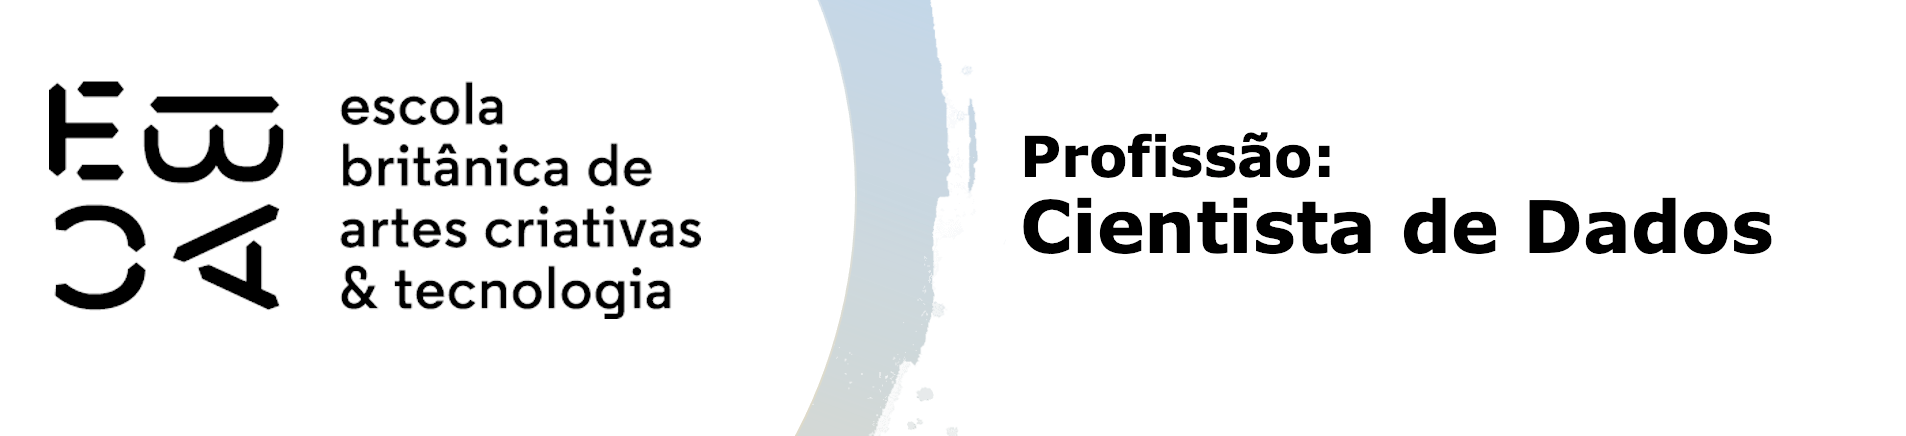

# Métodos hierárquicos de agrupamento

## Tipos de ligação

O tipo de ligação é a forma como vamos conectar um elemento a um conjunto de pontos já agrupados. Este elemento pode ser um ponto ou outro agrupamento de pontos. Há várias formas de se definir este critério, vamos discutir algumas e suas características.

In [1]:
import pandas                  as pd
import seaborn                 as sns
import matplotlib.pyplot       as plt
import numpy                   as np

from   sklearn.cluster         import AgglomerativeClustering
from   sklearn.preprocessing   import StandardScaler
from   sklearn                 import datasets

import scipy.cluster.hierarchy as shc

from   sklearn.cluster         import KMeans

%reload_ext watermark
%watermark -iv -v -p sklearn

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

sklearn: 1.3.2

numpy     : 1.26.2
seaborn   : 0.13.0
pandas    : 2.1.3
scipy     : 1.11.4
sklearn   : 1.3.2
matplotlib: 3.8.2



## Parâmetros do algoritmo - Tipos de ligação

| | |
|:-:|:-:|
|***Single linkage*** (ligação simples): a distância de um ponto ao cluster é o mínimo entre todas as distâncias do ponto a cada ponto do grupo.| ***Complete linkage*** (ligação completa): A distância de um ponto ao cluste é o máximo entre todas as distâncias do ponto a cada ponto do grupo. |
|<div>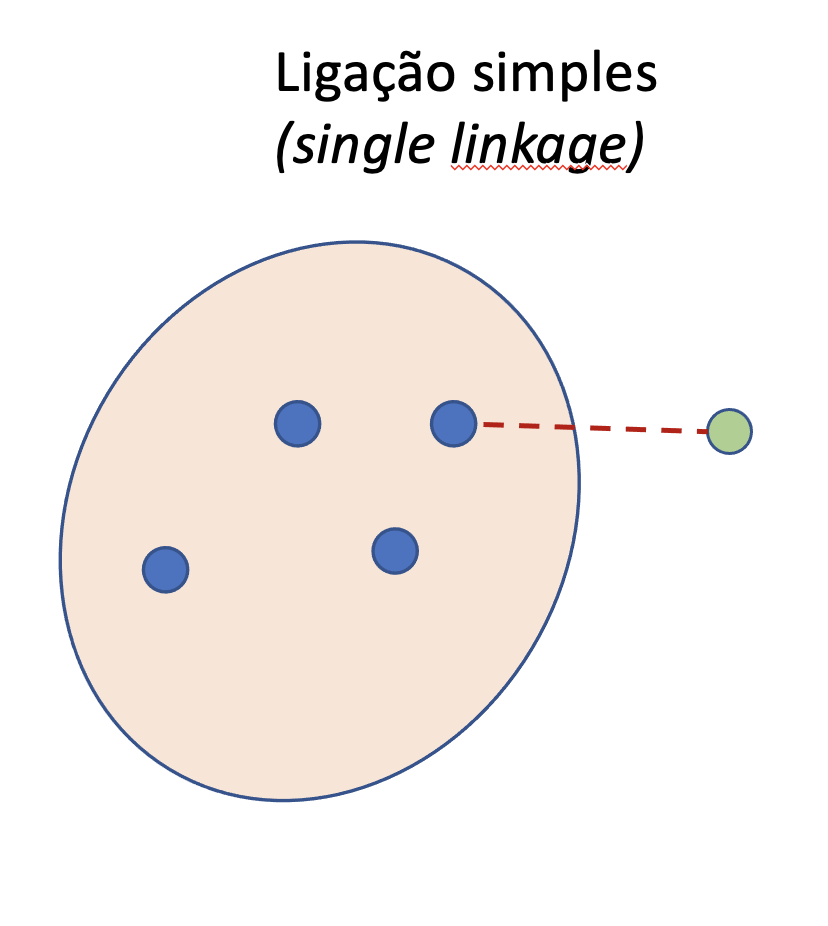</div> | <div>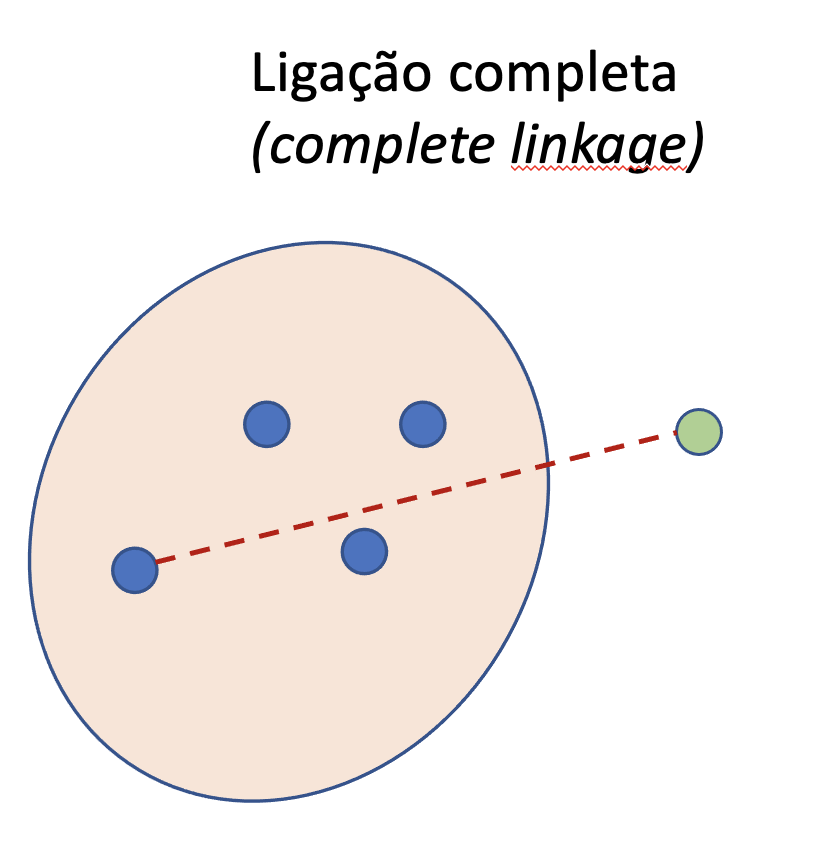</div>|
|***Average linkage*** (Ligação média): A distância de um ponto ao cluster é a média entre todas as distâncias do ponto ao grupo | ***Ward linkage*** (ligação Ward): Esse método se baseia na soma de quadrados das distâncias (SQD) de cada ponto ao centróide do seu respectivo grupo. A distância entre dois clusters se define como o aumento na SQD se juntarmos esses dois grupos.|
|<div>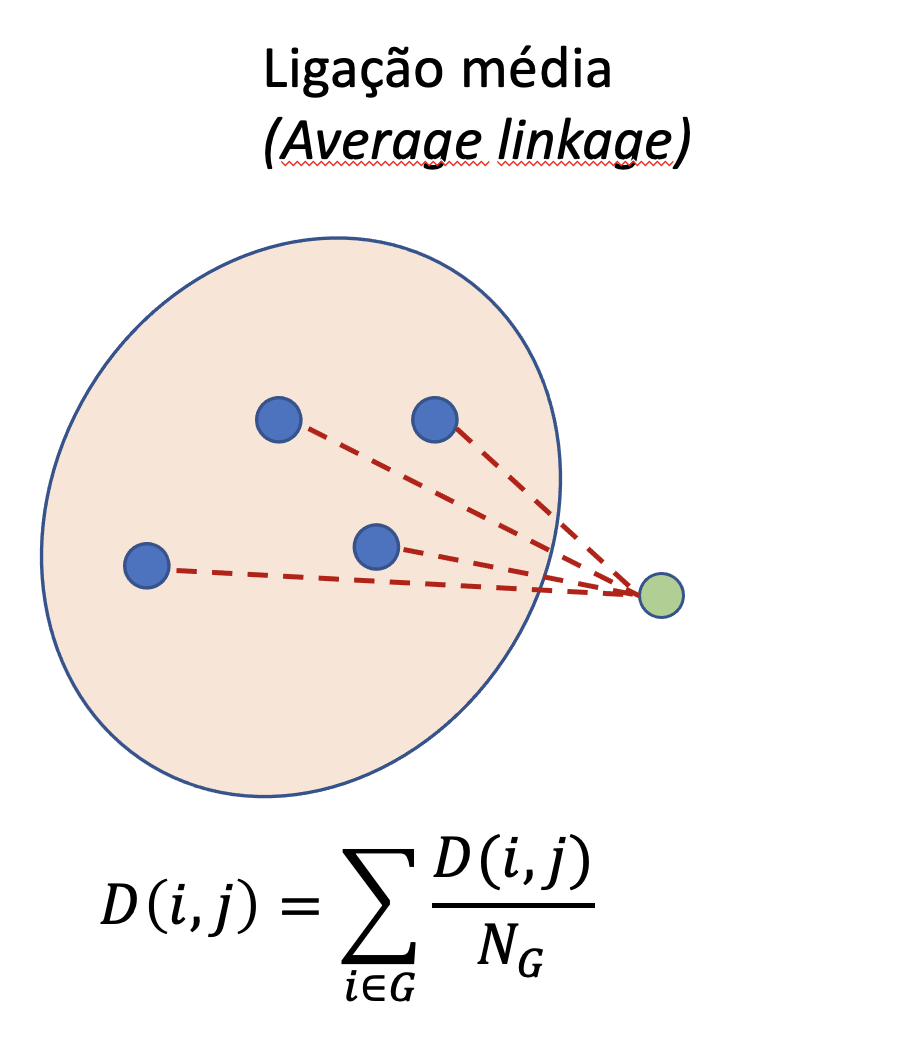</div>|<div>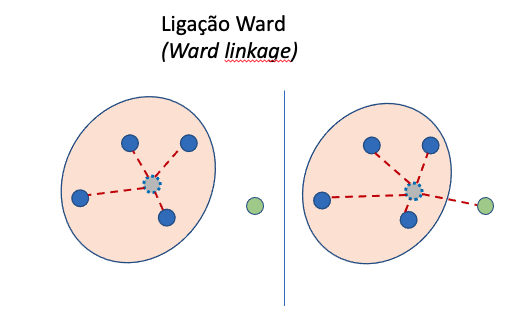</div> |


<!-- 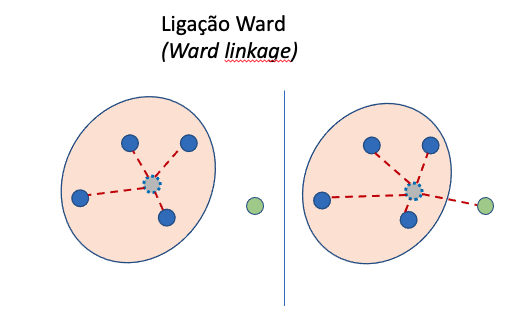 -->
<!-- ![image-4.png](attachment:image-4.png) -->

## Dados sintéticos

https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering

In [2]:
X1, Y1 = datasets.make_moons(n_samples=400,
                  noise=0.05,
                  random_state=2360873)

X2, Y2  = datasets.make_circles(n_samples=390, noise=0.01,factor=0.5)

X3, Y3 = datasets.make_blobs(n_samples=380, random_state=12345)

X4, Y4 = datasets.make_blobs(n_samples=450, random_state=12345)
X4 = np.dot(X4, [[1, 2], [2, 2]])

X = [X1, X2, X3, X4]
Y = [Y1, Y2, Y3, Y4]

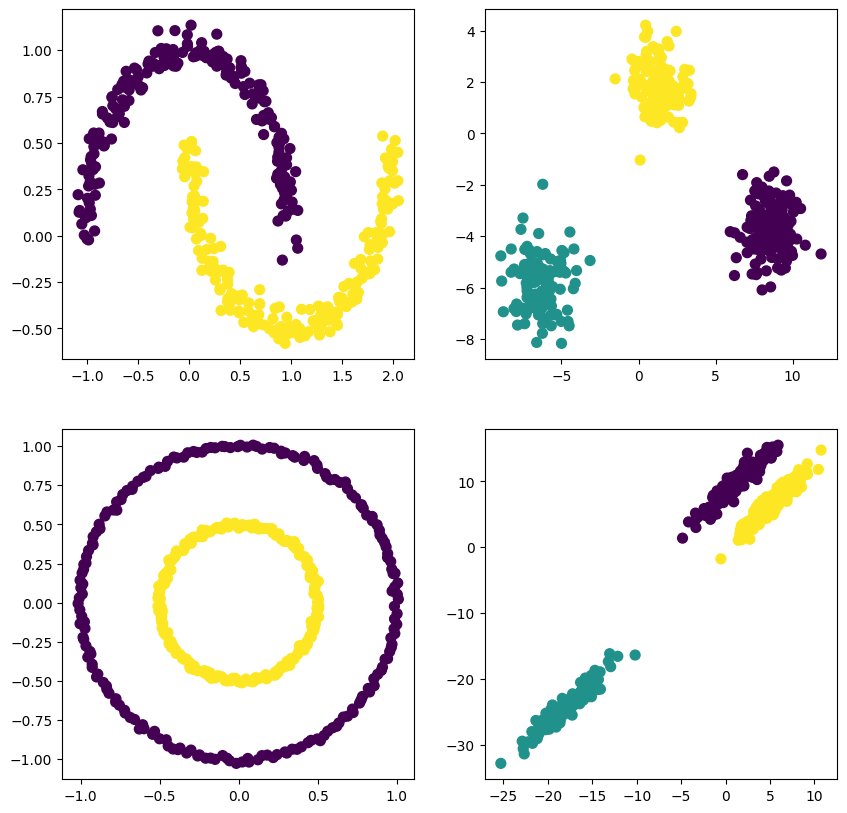

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i in range(4):
    ax[i%2,i//2].scatter(X[i][:,0],X[i][:,1], c = Y[i], marker="o", s=50);
# ax[0,0].set_title("Original Data");

In [16]:
ls = []
lc = []
lm = []
wd = []
km = []

mt = [ls, lc, lm, wd, km]
metodos = ['single', 'complete', 'average', 'ward', 'k-means']

for i in range(4):
    for j in range(4):
        mt[j].append(AgglomerativeClustering(n_clusters=len(np.unique(Y[i])), linkage=metodos[j]).fit(X[i]))

for i in range(4):
    mt[4].append(KMeans(n_clusters=len(np.unique(Y[i])), n_init=10).fit(X[i]))
    


In [17]:
mt

[[AgglomerativeClustering(linkage='single'),
  AgglomerativeClustering(linkage='single'),
  AgglomerativeClustering(linkage='single', n_clusters=3),
  AgglomerativeClustering(linkage='single', n_clusters=3)],
 [AgglomerativeClustering(linkage='complete'),
  AgglomerativeClustering(linkage='complete'),
  AgglomerativeClustering(linkage='complete', n_clusters=3),
  AgglomerativeClustering(linkage='complete', n_clusters=3)],
 [AgglomerativeClustering(linkage='average'),
  AgglomerativeClustering(linkage='average'),
  AgglomerativeClustering(linkage='average', n_clusters=3),
  AgglomerativeClustering(linkage='average', n_clusters=3)],
 [AgglomerativeClustering(),
  AgglomerativeClustering(),
  AgglomerativeClustering(n_clusters=3),
  AgglomerativeClustering(n_clusters=3)],
 [KMeans(n_clusters=2, n_init=10),
  KMeans(n_clusters=2, n_init=10),
  KMeans(n_clusters=3, n_init=10),
  KMeans(n_clusters=3, n_init=10)]]

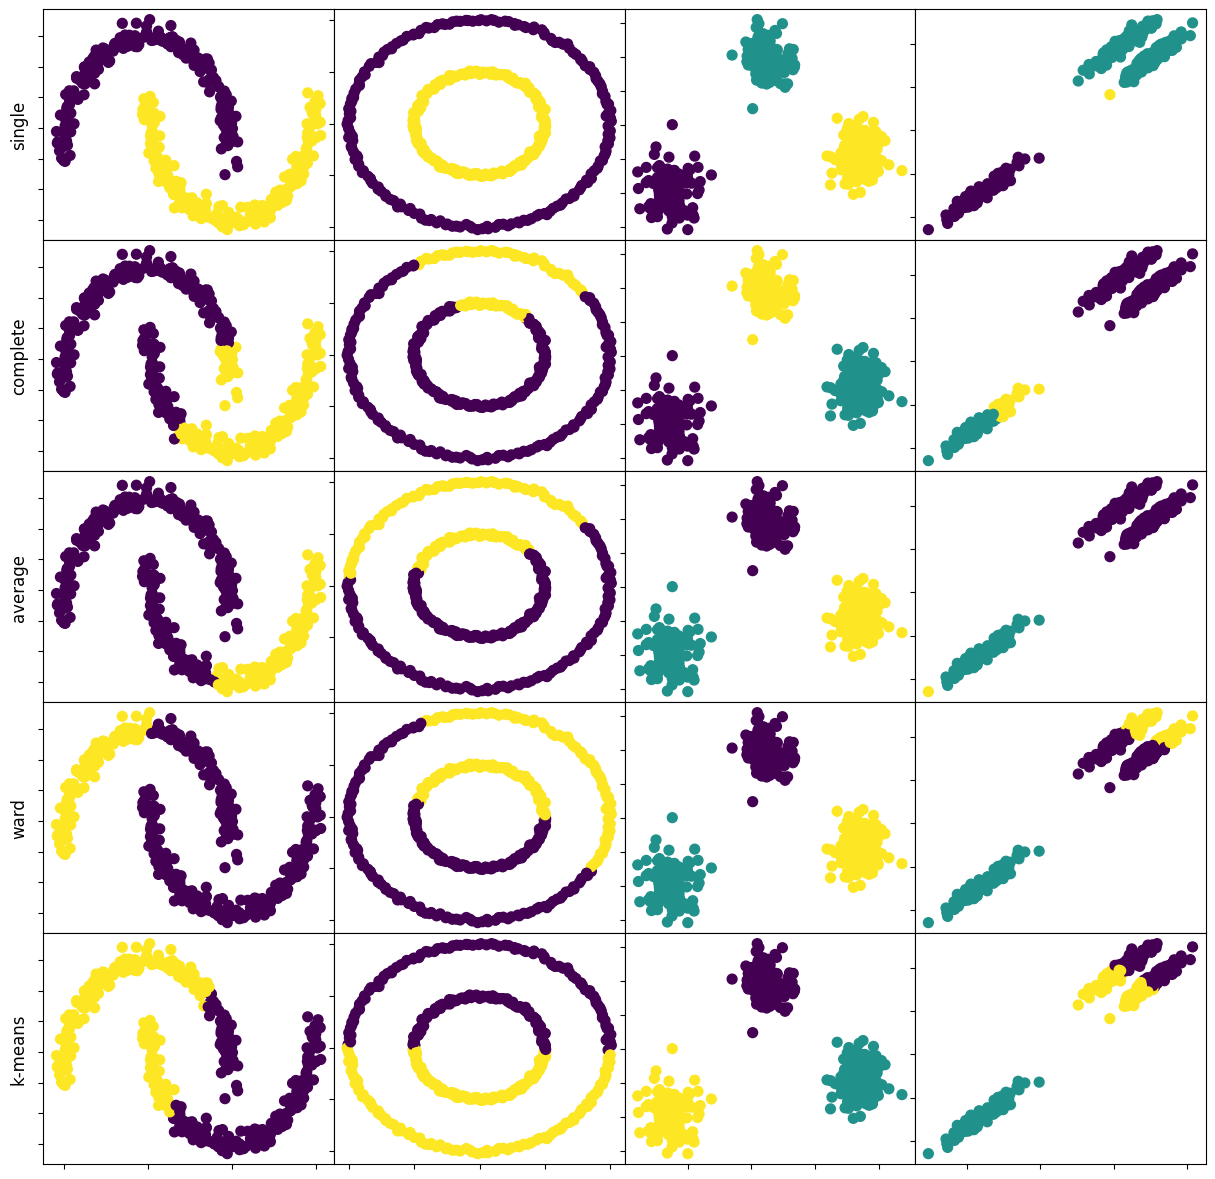

In [18]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15,15))

for i in range(4):
    # Desativar rótulos dos eixos
    
    for j in range(5):
        ax[j,i].scatter(X[i][:,0],X[i][:,1], c = mt[j][i].labels_, marker="o", s=50);
        
        ax[j,i].set_yticklabels([])
        ax[j,i].set_xticklabels([])
        if i==0:
            ax[j,i].set_ylabel(metodos[j], fontsize='large')
        
    
plt.subplots_adjust(wspace=0, hspace=0)

